# VADER Sentiment Analysis

Dataset: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [30]:
import os
import re
import nltk
import pandas as pd
import numpy as np
import mplcatppuccin
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [31]:
rcParams['figure.figsize'] = (12,  6)
rcParams['figure.dpi'] = 200

In [ ]:
nltk.download("all")

In [34]:
def strip_html(text):
    result = re.sub("<.*?>|<br>", "", text)
    return result

In [28]:
df = pd.read_csv("imdb_reviews.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


<Axes: >

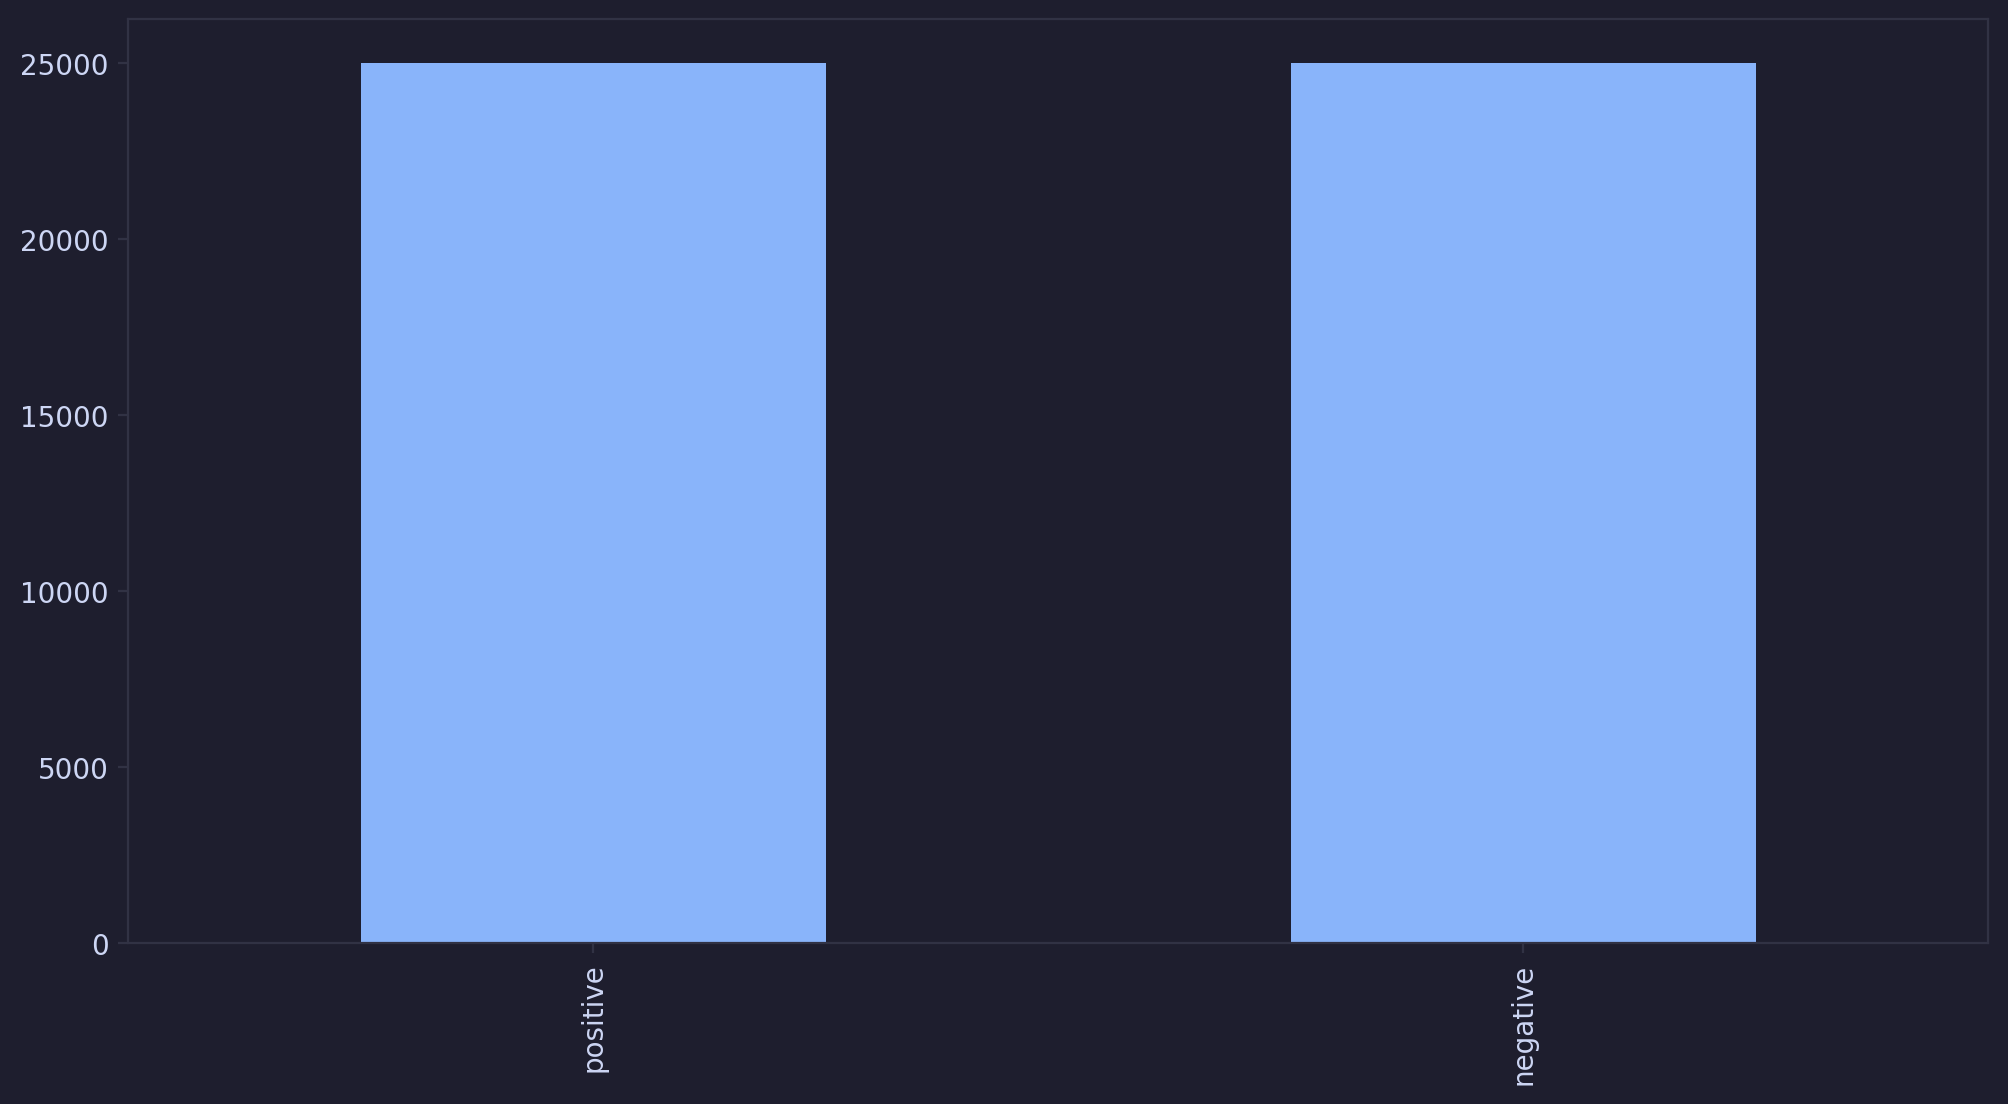

In [32]:
mpl.style.use("mocha")
df['sentiment'].value_counts().plot(kind="bar")

In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated(subset=['review']).sum()

418

In [10]:
df.drop_duplicates()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [35]:
df["review"] = df["review"].apply(lambda x: strip_html(x))

In [37]:
vader = SentimentIntensityAnalyzer()

In [39]:
df['vader_score'] = df['review'].apply(lambda x: vader.polarity_scores(x))
df

,review,sentiment,vader_score
0,One of the other reviewers has mentioned that ...,positive,"{'neg': 0.207, 'neu': 0.744, 'pos': 0.049, 'co..."
1,A wonderful little production. The filming tec...,positive,"{'neg': 0.055, 'neu': 0.768, 'pos': 0.177, 'co..."
2,I thought this was a wonderful way to spend ti...,positive,"{'neg': 0.096, 'neu': 0.708, 'pos': 0.196, 'co..."
3,Basically there's a family where a little boy ...,negative,"{'neg': 0.144, 'neu': 0.788, 'pos': 0.068, 'co..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"{'neg': 0.053, 'neu': 0.795, 'pos': 0.152, 'co..."
...,...,...,...
49995,I thought this movie did a down right good job...,positive,"{'neg': 0.048, 'neu': 0.749, 'pos': 0.203, 'co..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"{'neg': 0.171, 'neu': 0.711, 'pos': 0.118, 'co..."
49997,I am a Catholic taught in parochial elementary...,negative,"{'neg': 0.211, 'neu': 0.679, 'pos': 0.11, 'com..."
49998,I'm going to have to disagree with the previou...,negative,"{'neg': 0.105, 'neu': 0.813, 'pos': 0.082, 'co..."


In [40]:
df['compound'] = df['vader_score'].apply(lambda score: score['compound'])
df

,review,sentiment,vader_score,compound
0,One of the other reviewers has mentioned that ...,positive,"{'neg': 0.207, 'neu': 0.744, 'pos': 0.049, 'co...",-0.9951
1,A wonderful little production. The filming tec...,positive,"{'neg': 0.055, 'neu': 0.768, 'pos': 0.177, 'co...",0.9641
2,I thought this was a wonderful way to spend ti...,positive,"{'neg': 0.096, 'neu': 0.708, 'pos': 0.196, 'co...",0.9605
3,Basically there's a family where a little boy ...,negative,"{'neg': 0.144, 'neu': 0.788, 'pos': 0.068, 'co...",-0.9213
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"{'neg': 0.053, 'neu': 0.795, 'pos': 0.152, 'co...",0.9744
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,"{'neg': 0.048, 'neu': 0.749, 'pos': 0.203, 'co...",0.9890
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"{'neg': 0.171, 'neu': 0.711, 'pos': 0.118, 'co...",-0.6693
49997,I am a Catholic taught in parochial elementary...,negative,"{'neg': 0.211, 'neu': 0.679, 'pos': 0.11, 'com...",-0.9851
49998,I'm going to have to disagree with the previou...,negative,"{'neg': 0.105, 'neu': 0.813, 'pos': 0.082, 'co...",-0.7648


In [41]:
df['vader_sentiment'] = df['compound'].apply(lambda c: 'positive' if c >= 0 else 'negative')
df

,review,sentiment,vader_score,compound,vader_sentiment
0,One of the other reviewers has mentioned that ...,positive,"{'neg': 0.207, 'neu': 0.744, 'pos': 0.049, 'co...",-0.9951,negative
1,A wonderful little production. The filming tec...,positive,"{'neg': 0.055, 'neu': 0.768, 'pos': 0.177, 'co...",0.9641,positive
2,I thought this was a wonderful way to spend ti...,positive,"{'neg': 0.096, 'neu': 0.708, 'pos': 0.196, 'co...",0.9605,positive
3,Basically there's a family where a little boy ...,negative,"{'neg': 0.144, 'neu': 0.788, 'pos': 0.068, 'co...",-0.9213,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"{'neg': 0.053, 'neu': 0.795, 'pos': 0.152, 'co...",0.9744,positive
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,"{'neg': 0.048, 'neu': 0.749, 'pos': 0.203, 'co...",0.9890,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"{'neg': 0.171, 'neu': 0.711, 'pos': 0.118, 'co...",-0.6693,negative
49997,I am a Catholic taught in parochial elementary...,negative,"{'neg': 0.211, 'neu': 0.679, 'pos': 0.11, 'com...",-0.9851,negative
49998,I'm going to have to disagree with the previou...,negative,"{'neg': 0.105, 'neu': 0.813, 'pos': 0.082, 'co...",-0.7648,negative


In [24]:
accuracy_score(df['sentiment'], df['vader_sentiment'])

0.69626

In [45]:
print(classification_report(df['sentiment'], df['vader_sentiment']))

report = classification_report(df['sentiment'], df['vader_sentiment'], output_dict=True)

rdf = pd.DataFrame(report).transpose()
rdf.to_csv("creport.csv")

              precision    recall  f1-score   support

    negative       0.79      0.54      0.64     25000
    positive       0.65      0.86      0.74     25000

    accuracy                           0.70     50000
   macro avg       0.72      0.70      0.69     50000
weighted avg       0.72      0.70      0.69     50000



In [26]:
print(confusion_matrix(df['sentiment'], df['vader_sentiment']))

[[13417 11583]
 [ 3604 21396]]
